### Load Packages

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset Overview

In [3]:
df = pd.read_csv("customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


**Bộ dữ liệu bao gồm 2000 dòng, 8 cột, trong đó:**

* CustomerID: ID của khách hàng
* Gender: giới tính của khách hàng
* Age: tuổi của khách hàng
* Annual Income: tổng thu nhập hàng năm của khách hàng
* Spending Score (1-100): số điểm tích lũy của khách hàng
* Profession: nghề nghiệp hiện tại của khách hàng
* Work Experience: số năm kinh nghiệm
* Family Size: số thành viên trong một gia đình

### Data Cleaning

**Kiểm tra giá trị null**

In [5]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

Có 35 giá trị null trong cột Profession

In [8]:
df["Profession"].unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

Để điền vào những ô còn thiếu giá trị trong cột **Profession**, ta sẽ điền giá trị phổ biến nhất trong cột **Profession**

In [10]:
df["Profession"].value_counts()

Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: Profession, dtype: int64

Artist chiểm trong số nhiều nhất, vì vậy ta sẽ điền giá trị null bằng giá trị Artist

In [11]:
df["Profession"].fillna("Artist", inplace = True)

In [12]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

**Kiểm tra giá trị trùng lặp**

In [14]:
df.duplicated().any()

False

Bộ dữ liệu không chứa giá trị trùng lặp

In [15]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


### EDA

In [43]:
numeric_columns = df[["Age", "Annual Income ($)","Spending Score (1-100)","Work Experience","Family Size"]].columns.to_list()
numeric_columns

['Age',
 'Annual Income ($)',
 'Spending Score (1-100)',
 'Work Experience',
 'Family Size']

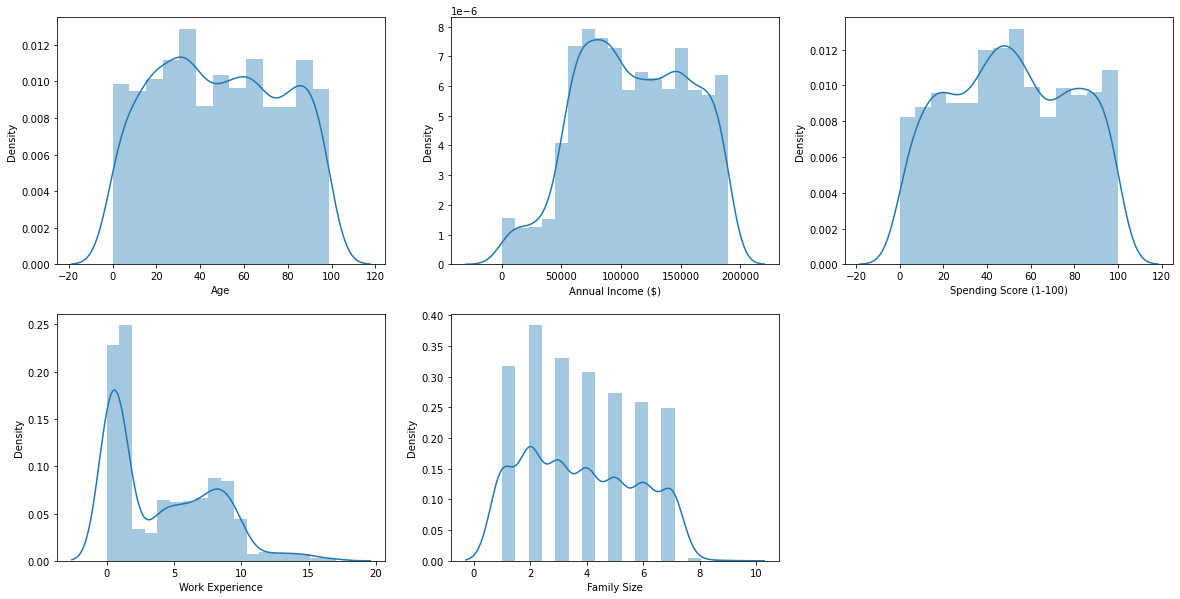

In [49]:
plt.figure(figsize = (20, 10));
number = 1
for i in numeric_columns:
    plt.subplot(2, 3, number)
    number += 1
    sns.distplot(df[i])
plt.show()

Hầu hết các biến đều có phân phối chuẩn, trừ biến Work Experience bị lệch phải.

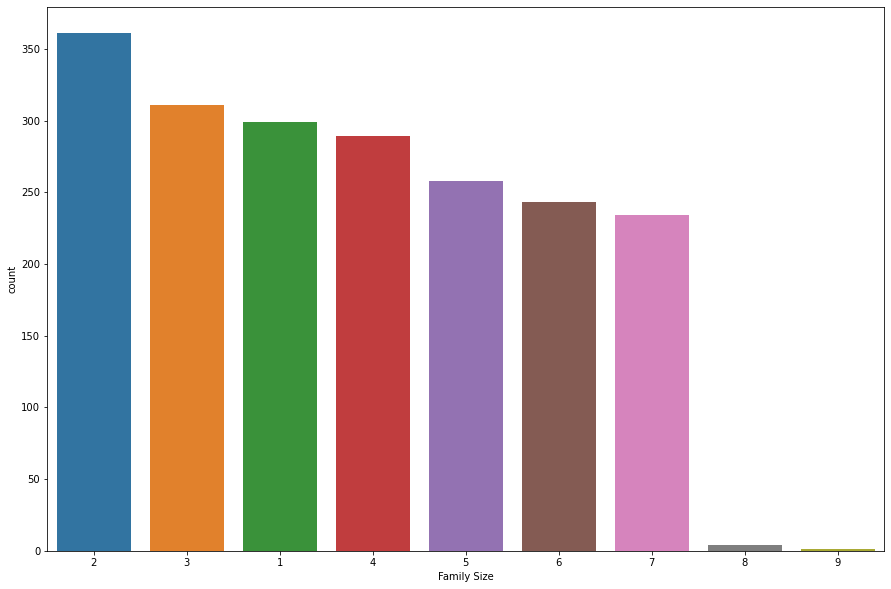

In [32]:
plt.figure(figsize = (15,10))
sns.countplot(x = df["Family Size"], data = df, order=  df["Family Size"].value_counts().index)
plt.show()

Gia đình có hai thành viên chiếm tỷ trọng lớn nhất với hơn 350 khách hàng gia đình có hai thành viên. Những khách hàng gia đình có hai thành viên rất có thể là vợ chồng mới cưới

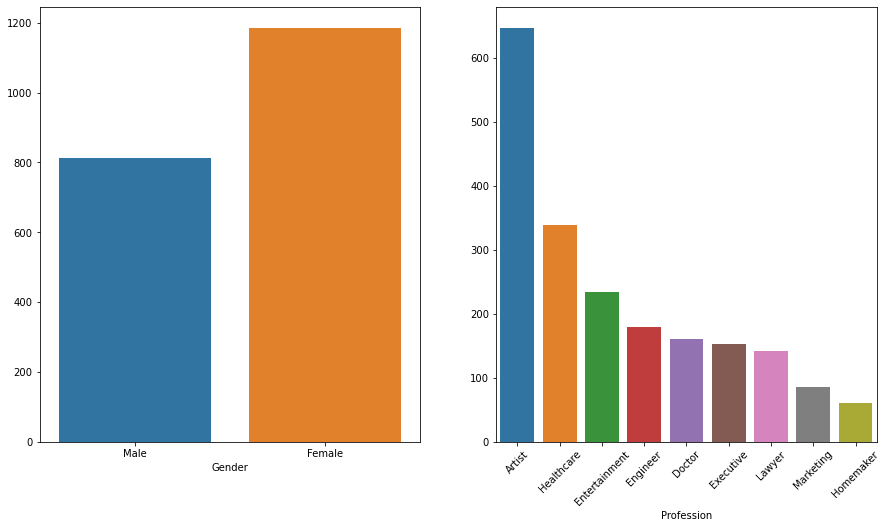

In [62]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,8))
sns.countplot(x = "Gender", data = df, ax = ax1)
ax1.set_ylabel("")
sns.countplot(x = "Profession", data = df, ax = ax2, order = df["Profession"].value_counts().index)
ax2.set_ylabel("")
plt.xticks(rotation = 45)
plt.show()

Nhìn vào đồ thị, ta thấy:

* Nữ giới mua sắm tại cửa hàng nhiều hơn nam giới

* Khách hàng làm công việc liên quan đến nghệ thuật mua hàng nhiều nhất, theo sau đó là ngành nghề liên quan đến sức khỏe, giải trí. Ở chiều ngược lại, những người làm công việc nội trợ mua hàng ít nhất

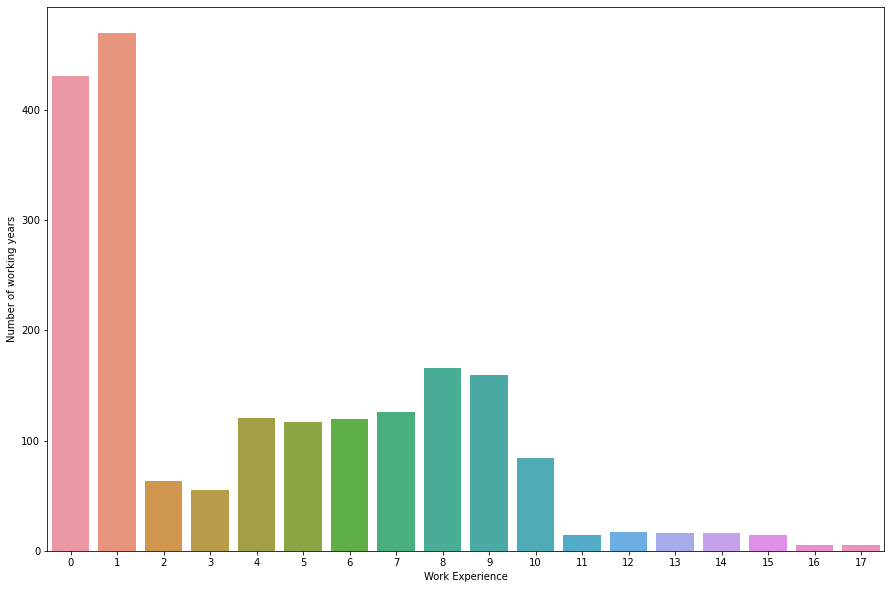

In [64]:
plt.figure(figsize = (15,10))
sns.countplot(x = "Work Experience", data = df)
plt.ylabel("Number of working years")
plt.show()

Những khách hàng có 0-1 năm kinh nghiệm chiếm phần lớn, trong khi đó chỉ có một lượng nhỏ khách hàng có trên 10 năm kinh nghiệm. Ở đây có thể có hai trường hợp:

* Một là sản phẩm của cửa hàng phù hợp với thị hiếu của các bạn trẻ

* Hai là giá cả của sản phẩm phải chăng, phù hợp cho những bạn trẻ chưa dư dả về mặt tài chính

### Conclude

* Phần lớn khách hàng gia đình có 2 thành viên, những khách hàng gia đình có 8,9 thành viên chỉ chiếm tỷ trọng rất nhỏ

* Sản phẩm tại cửa hàng thu hút nữ giới nhiều hơn nam giới

* Khách hàng làm công việc liên quan đến nghệ thuật chi tiêu nhiều hơn tại cửa hàng

* Khách hàng có ít kinh nghiệm(<10 năm) mua sắm tại cửa hàng nhiều hơn